In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import netCDF4 as nc
import xarray as xr
import pickle as pk
from scipy.io import loadmat

## FIRST: A22

In [53]:
A22=pd.read_csv("A22_pandas.csv", na_values=[-999])

In [54]:
A22['DATE']

0       20120325.0
1       20120325.0
2       20120325.0
3       20120325.0
4       20120325.0
5       20120325.0
6       20120325.0
7       20120325.0
8       20120325.0
9       20120325.0
10      20120325.0
11      20120325.0
12      20120325.0
13      20120325.0
14      20120325.0
15      20120325.0
16      20120325.0
17      20120325.0
18      20120325.0
19      20120325.0
20      20120325.0
21      20120325.0
22      20120325.0
23      20120325.0
24      20120325.0
25      20120325.0
26      20120325.0
27      20120326.0
28      20120326.0
29      20120326.0
           ...    
2622    20120414.0
2623    20120414.0
2624    20120414.0
2625    20120414.0
2626    20120414.0
2627    20120414.0
2628    20120414.0
2629    20120414.0
2630    20120414.0
2631    20120414.0
2632    20120414.0
2633    20120414.0
2634    20120414.0
2635    20120414.0
2636    20120414.0
2637    20120414.0
2638    20120414.0
2639    20120414.0
2640    20120414.0
2641    20120414.0
2642    20120414.0
2643    2012

In [55]:
lat22 = pd.to_numeric(A22['LATITUDE'])
lon22 = pd.to_numeric(A22['LONGITUDE'])

In [56]:
lata22=np.asarray(lat22)
lona22 = np.asarray(lon22)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


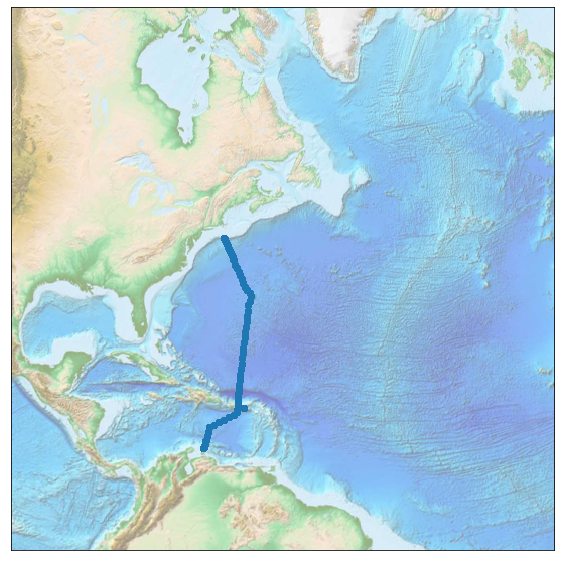

In [57]:
fig = plt.figure(figsize=(10, 10))
m1 = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=35, lon_0=-60,)
m1.etopo(scale=0.5, alpha=0.5)

lons22, lats22 = m1(lona22, lata22)
m1.scatter(lons22, lats22)

In [58]:
# now try to add southern boundary coords

bcfile = "../NWA_bdry_edit_y2012.nc"
bcds = nc.Dataset(bcfile, "r")
print(bcds.variables.keys())

odict_keys(['theta_s', 'theta_b', 'Tcline', 'hc', 's_rho', 's_w', 'Cs_r', 'Cs_w', 'h', 'ocean_time', 'zeta_south', 'zeta_east', 'temp_east', 'temp_south', 'salt_east', 'salt_south', 'angle', 'lat_psi', 'lat_rho', 'lat_u', 'lat_v', 'lon_psi', 'lon_rho', 'lon_u', 'lon_v', 'mask_psi', 'mask_rho', 'mask_u', 'mask_v', 'pm', 'pn', 'u_east', 'u_south', 'ubar_east', 'ubar_south', 'v_east', 'v_south', 'vbar_east', 'vbar_south', 'alk_east', 'alk_south', 'dic_east', 'dic_south'])


In [59]:
lat = bcds.variables['lat_rho'][:]
late = lat[:, 721]
lats = lat[0, :]

lon = bcds.variables['lon_rho'][:]
lons = lon[0, :]
lone = lon[:, 721]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


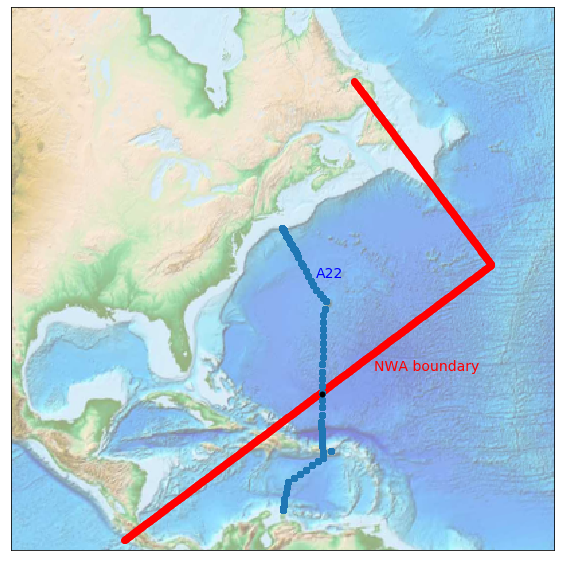

In [60]:
fig = plt.figure(figsize=(12, 10))
m2 = Basemap(projection='lcc', resolution=None,
            width=6E6, height=6E6, 
            lat_0=35, lon_0=-70,)
m2.etopo(scale=0.5, alpha=0.5)

lonsbc, latsbc = m2(lons, lats)
m2.scatter(lonsbc, latsbc, c='red')

lonebc, latebc = m2(lone, late)
m2.scatter(lonebc, latebc, c='red')

lons22, lats22 = m2(lona22, lata22)
m2.scatter(lons22, lats22)

x1, y1 = m2(-66, 35)
plt.text(x1, y1, 'A22', fontsize=14, c="blue");

x2, y2 = m2(-60, 25.5)
plt.text(x2, y2, 'NWA boundary', fontsize=14, c="red");

x, y = m2(-65.8, 23.5)
plt.plot(x, y, 'ok', markersize=5)

plt.savefig("map.png")

In [61]:
IS = A22[(A22['LATITUDE'] >= 23.6) & (A22['LATITUDE'] <= 23.7)]

In [62]:
lonIS = IS['LONGITUDE']
latIS = IS['LATITUDE']
alkIS = IS['ALKALI']
PIS = IS['CTDPRS']
DICIS = IS['TCARBN']
DATEIS = IS['DATE']

In [63]:
latIS

1292    23.6221
1293    23.6221
1294    23.6221
1295    23.6221
1296    23.6221
1297    23.6221
1298    23.6221
1299    23.6221
1300    23.6221
1301    23.6221
1302    23.6221
1303    23.6221
1304    23.6221
1305    23.6221
1306    23.6221
1307    23.6221
1308    23.6221
1309    23.6221
1310    23.6221
1311    23.6221
1312    23.6221
1313    23.6221
1314    23.6221
1315    23.6221
1316    23.6221
1317    23.6221
1318    23.6221
1319    23.6221
1320    23.6221
1321    23.6221
1322    23.6221
1323    23.6221
1324    23.6221
1325    23.6221
1326    23.6221
1327    23.6221
Name: LATITUDE, dtype: float64

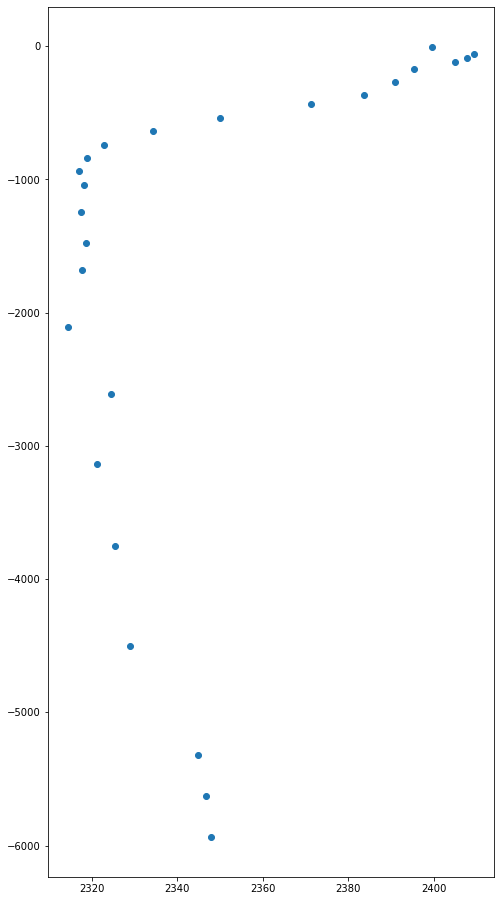

In [64]:
plt.figure(figsize=[8, 16])
plt.scatter(alkIS, -PIS)

In [65]:
print(lats[385])
print(lons[385])

23.628365022002917
293.9952436034145


In [66]:
lats.shape

(722,)

In [67]:
alks = bcds.variables['alk_south']
dics =bcds.variables['dic_south']

In [68]:
alks.shape

(73, 40, 722)

In [124]:
alk_prof = alks[21, :, 385]
dic_prof = dics[21, :, 385]

In [125]:
# import depth
with open('../romsdepth.p', 'rb') as f:
    depth = pk.load(f)
    
# depths for the eastern boundary condition
depth.shape

(362, 722, 40)

In [126]:
depths = depth[0, :, :]
depths.shape

(722, 40)

In [127]:
depth_prof = depths[385, :]

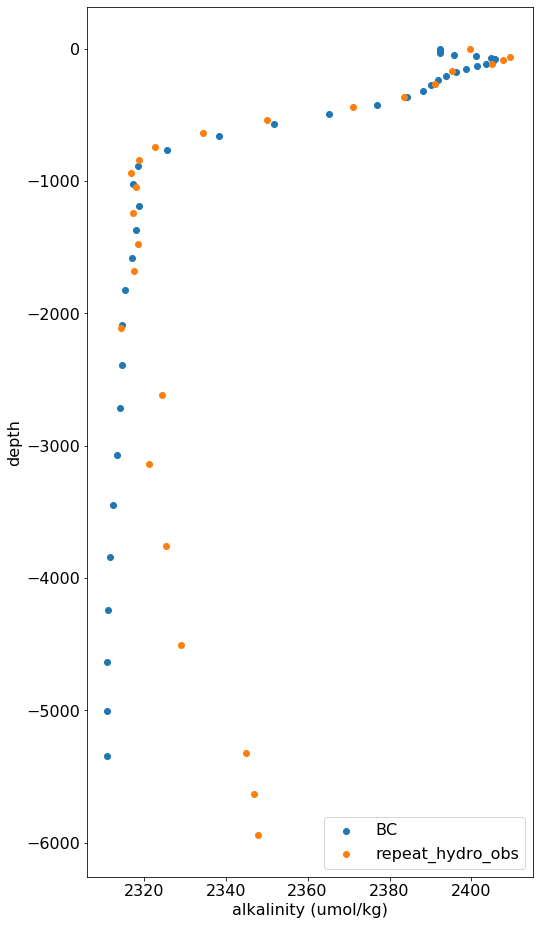

In [128]:
plt.figure(figsize=[8, 16])
plt.scatter(alk_prof, depth_prof)
plt.scatter(alkIS, -PIS)

plt.rcParams.update({'font.size': 16})
plt.legend(['BC', 'repeat_hydro_obs'], loc='lower right')
plt.xlabel('alkalinity (umol/kg)')
plt.ylabel('depth')

plt.savefig("TAprofile.png")

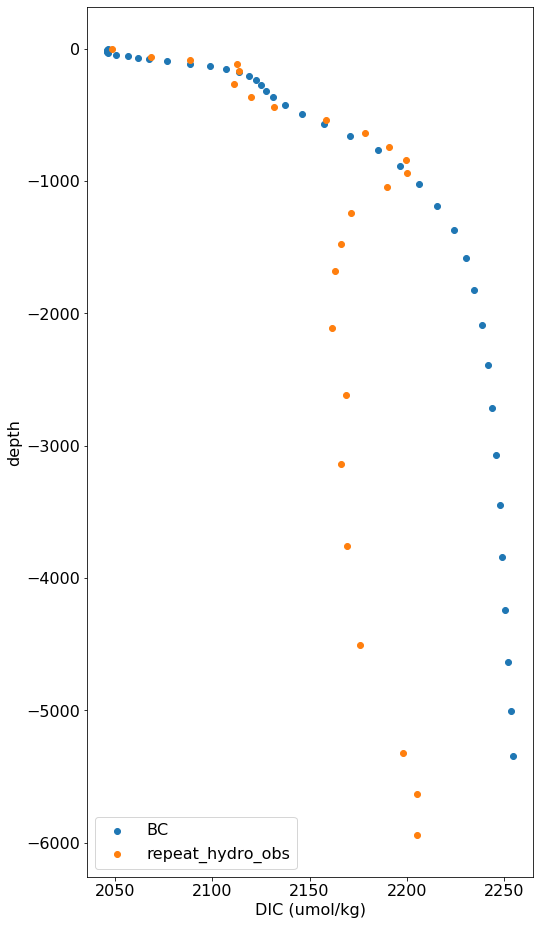

In [129]:
plt.figure(figsize=[8, 16])
plt.scatter(dic_prof, depth_prof)
plt.scatter(DICIS, -PIS)

plt.rcParams.update({'font.size': 16})
plt.legend(['BC', 'repeat_hydro_obs'], loc='lower left')
plt.xlabel('DIC (umol/kg)')
plt.ylabel('depth')

plt.savefig("DICprofile.png")

## START A20

In [130]:
A20=pd.read_csv("A20_pandas.csv", na_values=[-999])

In [131]:
lat20 = pd.to_numeric(A20['LATITUDE'])
lon20 = pd.to_numeric(A20['LONGITUDE'])

lata20 = np.asarray(lat20)
lona20 = np.asarray(lon20)

In [132]:
lons20, lats20 = m2(lona20, lata20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


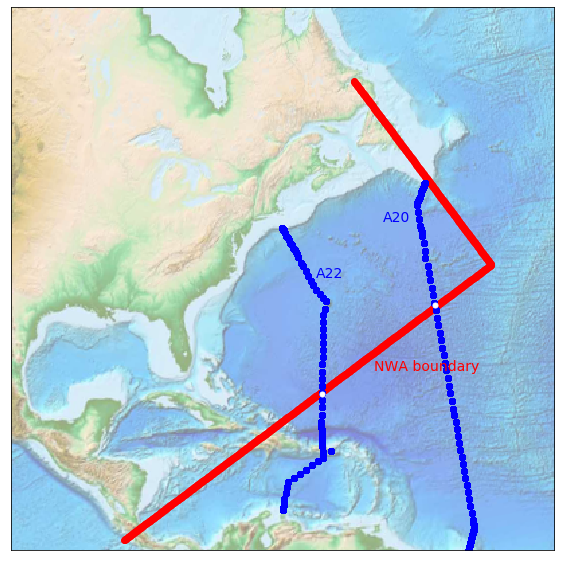

In [133]:
fig = plt.figure(figsize=(12, 10))
m3 = Basemap(projection='lcc', resolution=None,
            width=6E6, height=6E6, 
            lat_0=35, lon_0=-70,)
m3.etopo(scale=0.5, alpha=0.5)

m3.scatter(lonsbc, latsbc, c='red')
m3.scatter(lonebc, latebc, c='red')
m3.scatter(lons22, lats22, c="blue")
m3.scatter(lons20, lats20, c="blue")

plt.plot(x, y, 'ow', markersize=5)
plt.text(x1, y1, 'A22', fontsize=14, c="blue");
plt.text(x2, y2, 'NWA boundary', fontsize=14, c="red");

x3, y3 = m3(-57, 40)
plt.text(x3, y3, 'A20', fontsize=14, c="blue")

x4, y4 = m3(-52.3, 31)
plt.plot(x4, y4, 'ow', markersize=5)

plt.savefig("map2.png")

In [134]:
IS20 = A20[(A20['LATITUDE'] >= 30) & (A20['LATITUDE'] <= 31)]

In [135]:
DATE20 = IS20['DATE']

DATE20

1572    20120504.0
1573    20120504.0
1574    20120504.0
1575    20120504.0
1576    20120504.0
1577    20120504.0
1578    20120504.0
1579    20120504.0
1580    20120504.0
1581    20120504.0
1582    20120504.0
1583    20120504.0
1584    20120504.0
1585    20120504.0
1586    20120504.0
1587    20120504.0
1588    20120504.0
1589    20120504.0
1590    20120504.0
1591    20120504.0
1592    20120504.0
1593    20120504.0
1594    20120504.0
1595    20120504.0
1596    20120504.0
1597    20120504.0
1598    20120504.0
1599    20120504.0
1600    20120504.0
1601    20120504.0
1602    20120504.0
1603    20120504.0
1604    20120504.0
1605    20120504.0
1606    20120504.0
1607    20120504.0
Name: DATE, dtype: float64

In [136]:
lonIS20 = IS20['LONGITUDE']
latIS20 = IS20['LATITUDE']
alkIS20 = IS20['ALKALI']
PIS20 = IS20['CTDPRS']
DICIS20 = IS20['TCARBN']

In [137]:
latIS20

1572    30.495
1573    30.495
1574    30.495
1575    30.495
1576    30.495
1577    30.495
1578    30.495
1579    30.495
1580    30.495
1581    30.495
1582    30.495
1583    30.495
1584    30.495
1585    30.495
1586    30.495
1587    30.495
1588    30.495
1589    30.495
1590    30.495
1591    30.495
1592    30.495
1593    30.495
1594    30.495
1595    30.495
1596    30.495
1597    30.495
1598    30.495
1599    30.495
1600    30.495
1601    30.495
1602    30.495
1603    30.495
1604    30.495
1605    30.495
1606    30.495
1607    30.495
Name: LATITUDE, dtype: float64

In [138]:
lonIS20

1572   -52.3331
1573   -52.3331
1574   -52.3331
1575   -52.3331
1576   -52.3331
1577   -52.3331
1578   -52.3331
1579   -52.3331
1580   -52.3331
1581   -52.3331
1582   -52.3331
1583   -52.3331
1584   -52.3331
1585   -52.3331
1586   -52.3331
1587   -52.3331
1588   -52.3331
1589   -52.3331
1590   -52.3331
1591   -52.3331
1592   -52.3331
1593   -52.3331
1594   -52.3331
1595   -52.3331
1596   -52.3331
1597   -52.3331
1598   -52.3331
1599   -52.3331
1600   -52.3331
1601   -52.3331
1602   -52.3331
1603   -52.3331
1604   -52.3331
1605   -52.3331
1606   -52.3331
1607   -52.3331
Name: LONGITUDE, dtype: float64

In [139]:
alk_prof20 = alks[0, :, 617]
dic_prof20 = dics[0, :, 617]

depth_prof20 = depths[617, :]

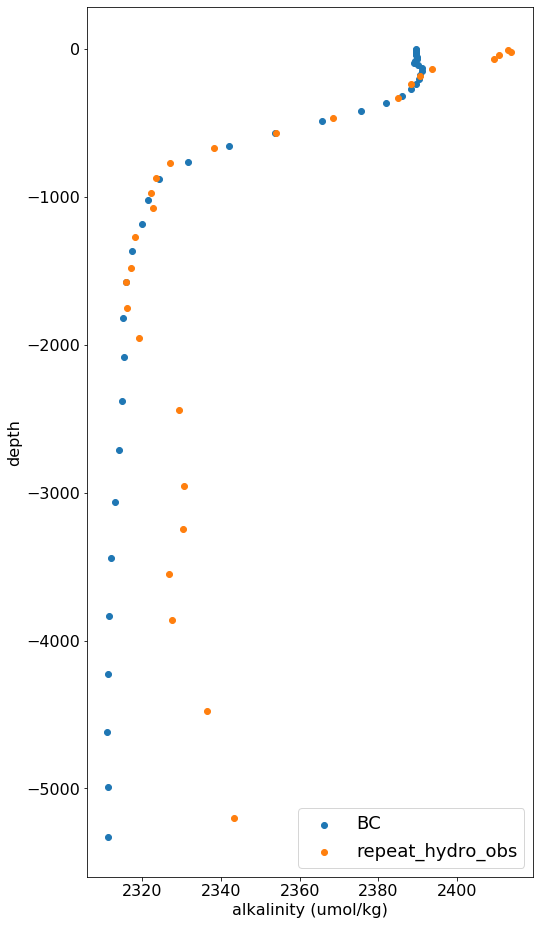

In [140]:
plt.figure(figsize=[8, 16])
plt.scatter(alk_prof20, depth_prof20)
plt.scatter(alkIS20, -PIS20)

plt.rcParams.update({'font.size': 18})
plt.legend(['BC', 'repeat_hydro_obs'], loc='lower right')
plt.xlabel('alkalinity (umol/kg)')
plt.ylabel('depth')

plt.savefig("TAprofile20.png")

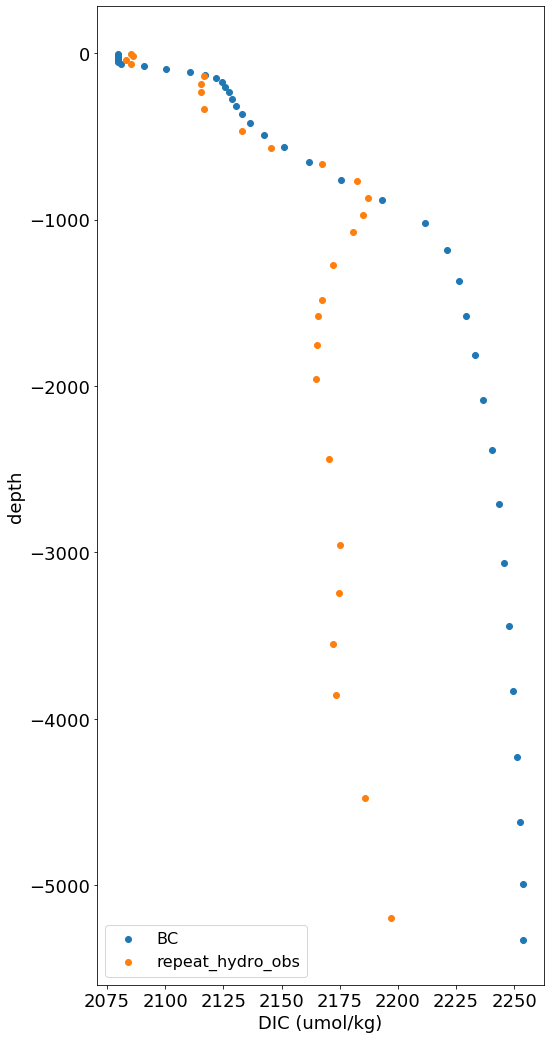

In [141]:
plt.figure(figsize=[8, 18])
plt.scatter(dic_prof20, depth_prof20)
plt.scatter(DICIS20, -PIS20)

plt.rcParams.update({'font.size': 16})
plt.legend(['BC', 'repeat_hydro_obs'], loc='lower left')
plt.xlabel('DIC (umol/kg)')
plt.ylabel('depth')

plt.savefig("DICprofile20.png")

In [142]:
orig_bc = "/d1/enrique/NWA_bdry_bio.nc"
origds = nc.Dataset(orig_bc)
print(origds.variables.keys())

odict_keys(['theta_s', 'theta_b', 'Tcline', 'hc', 's_rho', 's_w', 'Cs_r', 'Cs_w', 'h', 'ocean_time', 'alk_north', 'alk_south', 'alk_west', 'alk_east', 'cadet_arag_north', 'cadet_arag_south', 'cadet_arag_west', 'cadet_arag_east', 'cadet_calc_north', 'cadet_calc_south', 'cadet_calc_west', 'cadet_calc_east', 'dic_north', 'dic_south', 'dic_west', 'dic_east', 'ldon_north', 'ldon_south', 'ldon_west', 'ldon_east', 'lith_north', 'lith_south', 'lith_west', 'lith_east', 'lithdet_north', 'lithdet_south', 'lithdet_west', 'lithdet_east', 'nbact_north', 'nbact_south', 'nbact_west', 'nbact_east', 'ndet_north', 'ndet_south', 'ndet_west', 'ndet_east', 'ndi_north', 'ndi_south', 'ndi_west', 'ndi_east', 'nlg_north', 'nlg_south', 'nlg_west', 'nlg_east', 'nsm_north', 'nsm_south', 'nsm_west', 'nsm_east', 'nh4_north', 'nh4_south', 'nh4_west', 'nh4_east', 'no3_north', 'no3_south', 'no3_west', 'no3_east', 'po4_north', 'po4_south', 'po4_west', 'po4_east', 'o2_north', 'o2_south', 'o2_west', 'o2_east', 'srdon_nort

In [143]:
alkso = origds.variables['alk_south']
dicso =origds.variables['dic_south']

In [144]:
alk_o_20 = alkso[0, :, 617]
dic_o_20 = dicso[0, :, 617]

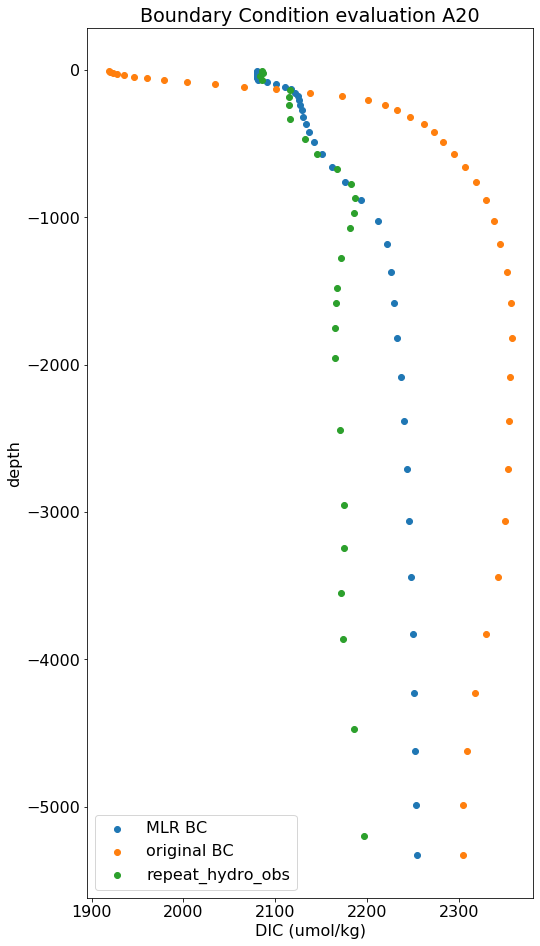

In [145]:
plt.figure(figsize=[8, 16])
plt.scatter(dic_prof20, depth_prof20)
plt.scatter(dic_o_20*1000000, depth_prof20)
plt.scatter(DICIS20, -PIS20)

plt.rcParams.update({'font.size': 16})
plt.legend(['MLR BC', 'original BC','repeat_hydro_obs'], loc='lower left')
plt.xlabel('DIC (umol/kg)')
plt.ylabel('depth')
plt.title('Boundary Condition evaluation A20')

plt.savefig("compareBC_DIC20.png")

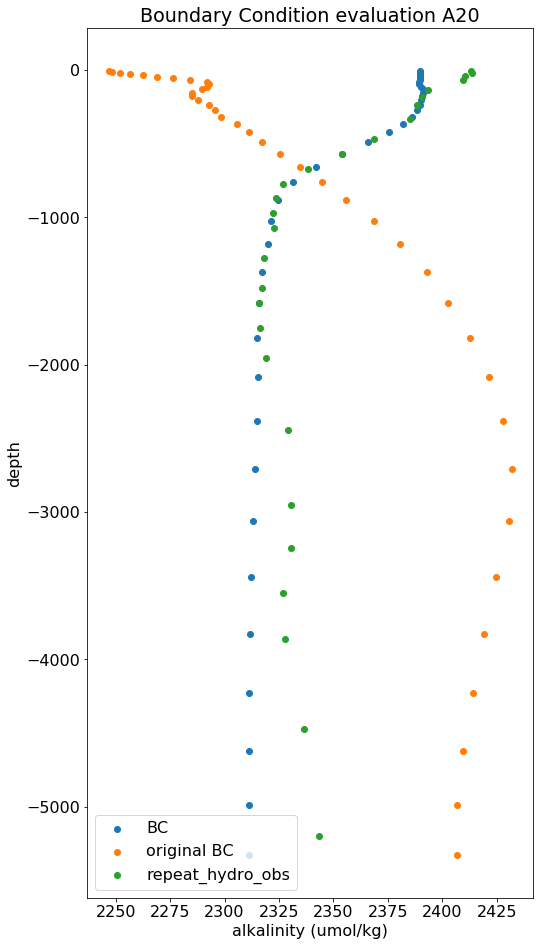

In [146]:
plt.figure(figsize=[8, 16])
plt.scatter(alk_prof20, depth_prof20)
plt.scatter(alk_o_20*1000000, depth_prof20)
plt.scatter(alkIS20, -PIS20)

plt.rcParams.update({'font.size': 16})
plt.legend(['BC', 'original BC','repeat_hydro_obs'], loc='lower left')
plt.xlabel('alkalinity (umol/kg)')
plt.ylabel('depth')
plt.title('Boundary Condition evaluation A20')

plt.savefig("compare_BC_TA20.png")

In [147]:
alk_o_22 = alkso[0, :, 385]
dic_o_22 = dicso[0, :, 385]

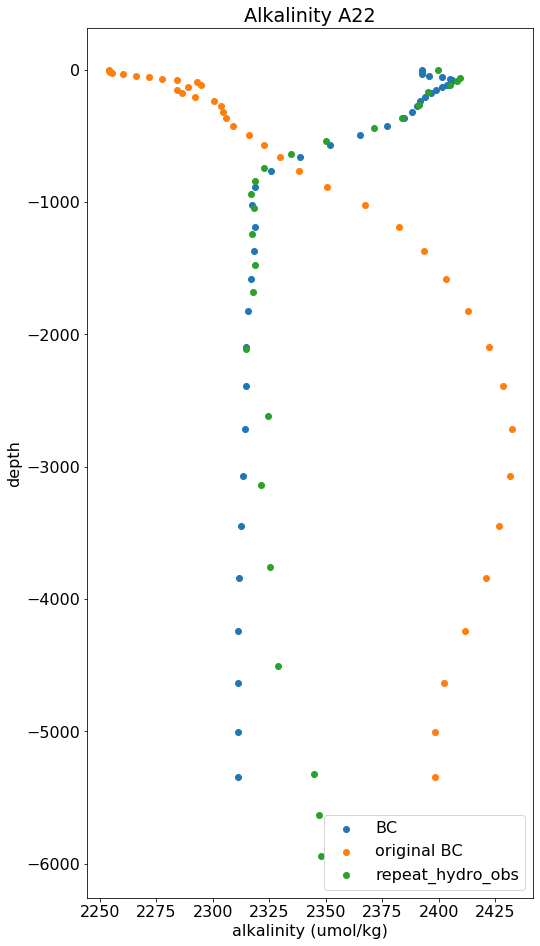

In [148]:
plt.figure(figsize=[8, 16])
plt.scatter(alk_prof, depth_prof)
plt.scatter(alk_o_22*1000000, depth_prof)
plt.scatter(alkIS, -PIS)

plt.rcParams.update({'font.size': 16})
plt.legend(['BC', 'original BC','repeat_hydro_obs'], loc='lower right')
plt.xlabel('alkalinity (umol/kg)')
plt.ylabel('depth')
plt.title('Alkalinity A22')

plt.savefig("CompareBC_TA22.png")

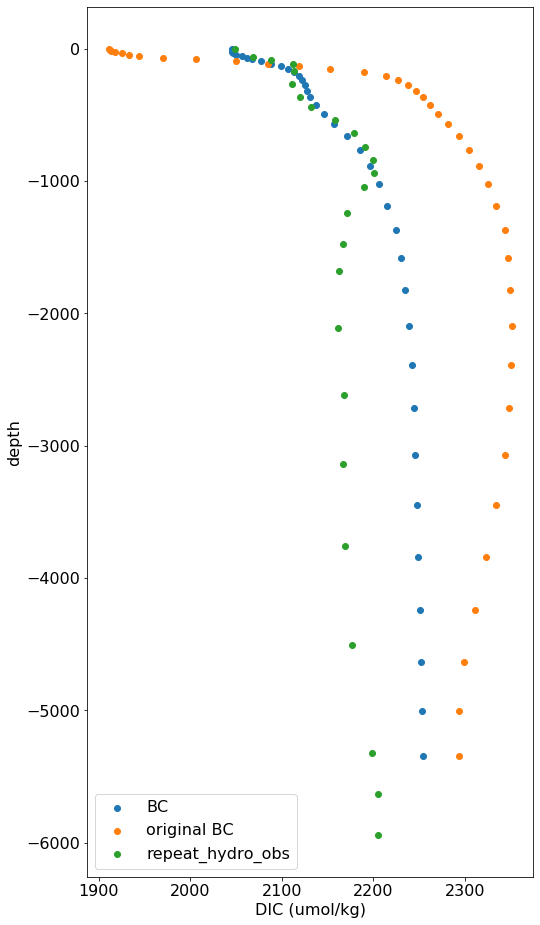

In [149]:
plt.figure(figsize=[8, 16])
plt.scatter(dic_prof, depth_prof)
plt.scatter(dic_o_22*1000000, depth_prof)
plt.scatter(DICIS, -PIS)

plt.rcParams.update({'font.size': 16})
plt.legend(['BC', 'original BC', 'repeat_hydro_obs'], loc='lower left')
plt.xlabel('DIC (umol/kg)')
plt.ylabel('depth')

plt.savefig("compare_BC_DIC22.png")

## ADD CMIP6 A22

In [150]:
xac22 = loadmat('../CMIP/ALK_CESM_A22.mat')
alk_cesm_a22 = xac22['alk22']

xdc22 = loadmat('../CMIP/DIC_CESM_A22.mat')
dic_cesm_a22 = xdc22['dic22']

xae22 = loadmat('../CMIP/ALK_ESM_A22.mat')
alk_esm_a22 = xae22['alk22']

xde22 = loadmat('../CMIP/DIC_ESM_A22.mat')
dic_esm_a22 = xde22['dic22']

vle = loadmat('../CMIP/lev_ESM.mat')
lev_esm = vle['lev']

vlc = loadmat('../CMIP/lev_CESM.mat')
lev_cesm = vlc['lev']

In [151]:
le = lev_esm*(-1)

lc = lev_cesm*(-1)
lc

array([[    0],
       [  -10],
       [  -20],
       [  -30],
       [  -50],
       [  -75],
       [ -100],
       [ -125],
       [ -150],
       [ -200],
       [ -250],
       [ -300],
       [ -400],
       [ -500],
       [ -600],
       [ -700],
       [ -800],
       [ -900],
       [-1000],
       [-1100],
       [-1200],
       [-1300],
       [-1400],
       [-1500],
       [-1750],
       [-2000],
       [-2500],
       [-3000],
       [-3500],
       [-4000],
       [-4500],
       [-5000],
       [-5500]], dtype=int32)

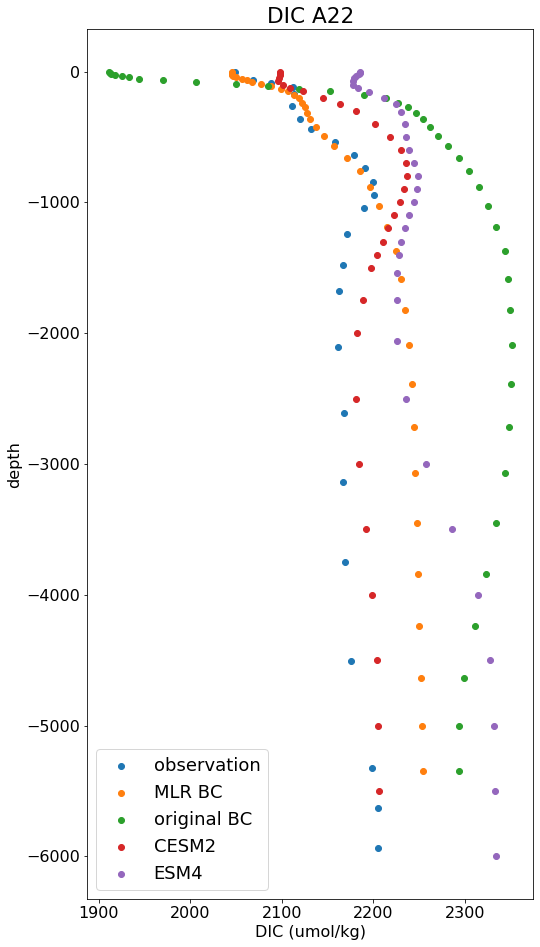

In [165]:
plt.figure(figsize=[8, 16])

plt.scatter(DICIS, -PIS)
plt.scatter(dic_prof, depth_prof)
plt.scatter(dic_o_22*1000000, depth_prof)
plt.scatter(dic_cesm_a22*1000, lc)
plt.scatter(dic_esm_a22*1000, le)

plt.rcParams.update({'font.size': 18})
plt.legend([ 'observation','MLR BC', 'original BC', 'CESM2', 'ESM4'], loc='lower left')
plt.xlabel('DIC (umol/kg)')
plt.ylabel('depth')
plt.title('DIC A22')

plt.savefig("compare_BC_DIC22.png")

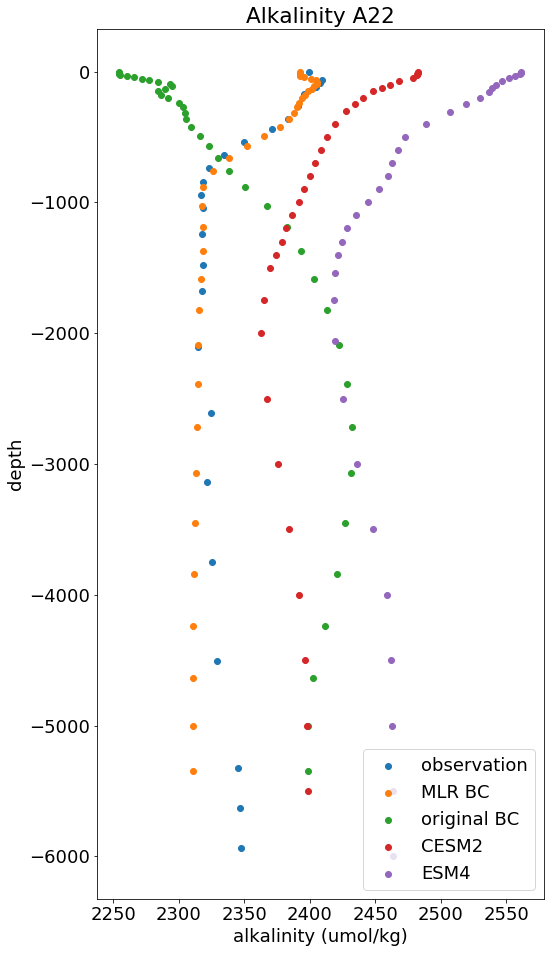

In [166]:
plt.figure(figsize=[8, 16])

plt.scatter(alkIS, -PIS)
plt.scatter(alk_prof, depth_prof)
plt.scatter(alk_o_22*1000000, depth_prof)
plt.scatter(alk_cesm_a22*1000, lc)
plt.scatter(alk_esm_a22*1000, le)

plt.rcParams.update({'font.size': 18})
plt.legend(['observation','MLR BC', 'original BC',  'CESM2', 'ESM4'], loc='lower right')
plt.xlabel('alkalinity (umol/kg)')
plt.ylabel('depth')
plt.title('Alkalinity A22')

plt.savefig("CompareBC_TA22.png")

## ADD CMIP A20

In [167]:
xac20 = loadmat('../CMIP/ALK_CESM_A20.mat')
alk_cesm_a20 = xac20['alk20']

xdc20 = loadmat('../CMIP/DIC_CESM_A20.mat')
dic_cesm_a20 = xdc20['dic20']

xae20 = loadmat('../CMIP/ALK_ESM_A20.mat')
alk_esm_a20 = xae20['alk20']

xde20 = loadmat('../CMIP/DIC_ESM_A20.mat')
dic_esm_a20 = xde20['dic20']

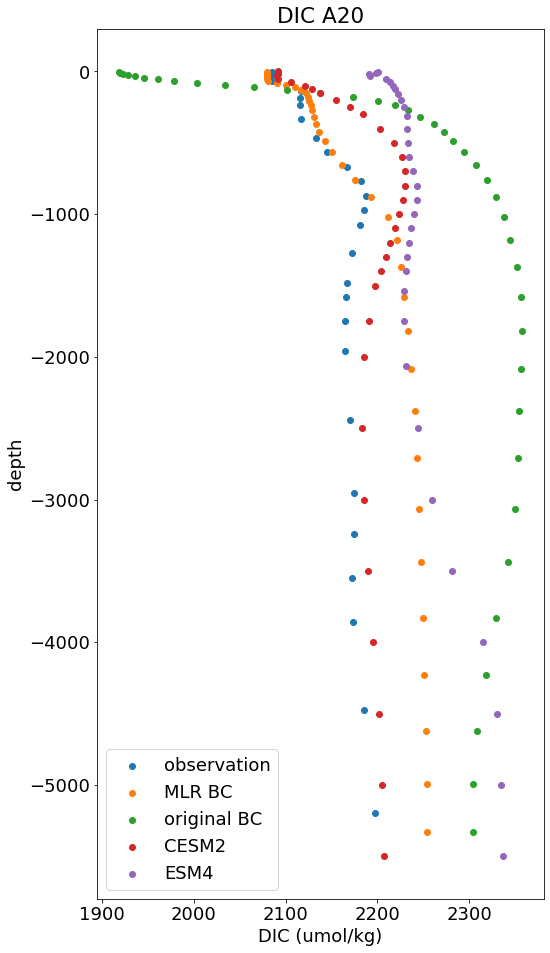

In [168]:
plt.figure(figsize=[8, 16])

plt.scatter(DICIS20, -PIS20)
plt.scatter(dic_prof20, depth_prof20)
plt.scatter(dic_o_20*1000000, depth_prof20)
plt.scatter(dic_cesm_a20*1000, lc)
plt.scatter(dic_esm_a20*1000, le)

plt.rcParams.update({'font.size': 18})
plt.legend(['observation','MLR BC', 'original BC',  'CESM2', 'ESM4'], loc='lower left')
plt.xlabel('DIC (umol/kg)')
plt.ylabel('depth')
plt.title('DIC A20')

plt.savefig("compareBC_DIC20.png")

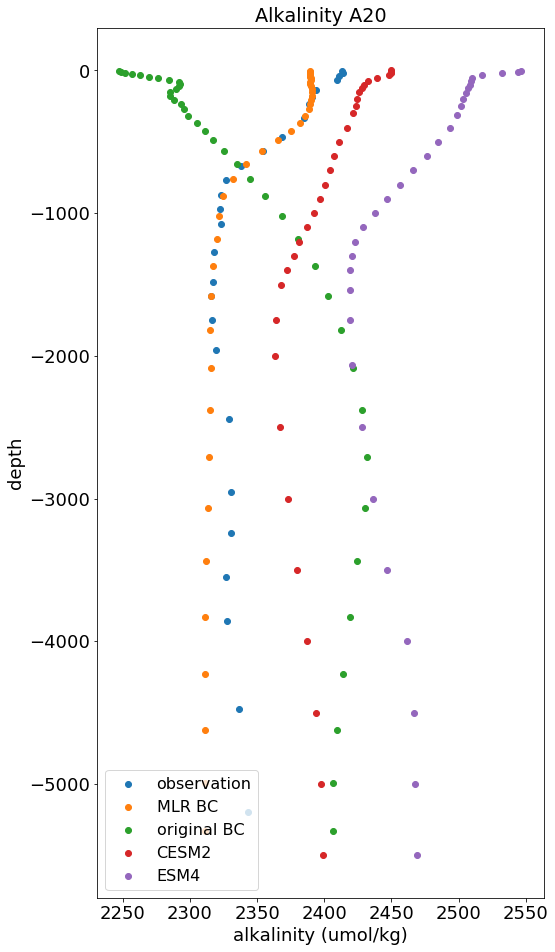

In [169]:
plt.figure(figsize=[8, 16])

plt.scatter(alkIS20, -PIS20)
plt.scatter(alk_prof20, depth_prof20)
plt.scatter(alk_o_20*1000000, depth_prof20)
plt.scatter(alk_cesm_a20*1000, lc)
plt.scatter(alk_esm_a20*1000, le)

plt.rcParams.update({'font.size': 16})
plt.legend(['observation','MLR BC', 'original BC',  'CESM2', 'ESM4'], loc='lower left')
plt.xlabel('alkalinity (umol/kg)')
plt.ylabel('depth')
plt.title('Alkalinity A20')

plt.savefig("compare_BC_TA20.png")